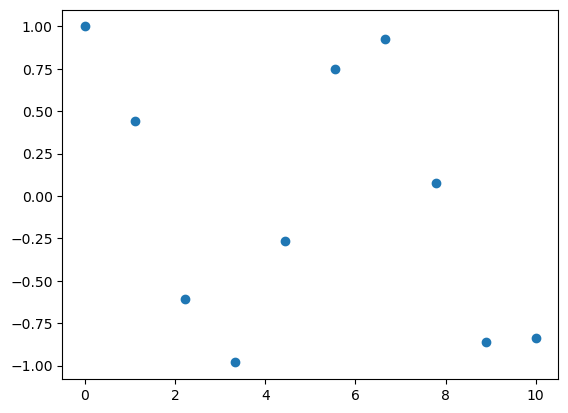

In [4]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 10)
y = np.cos(x)
plt.scatter(x, y)

In [5]:
f = interp1d(x, y, kind='cubic')

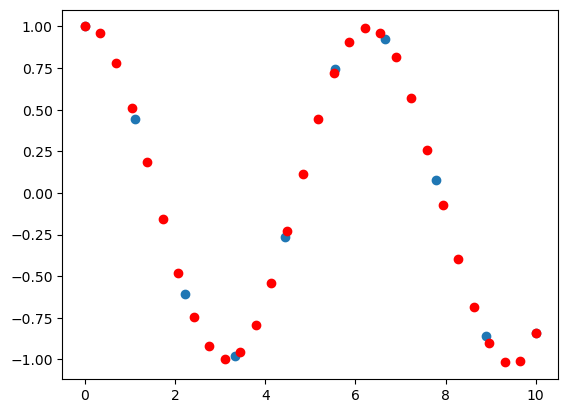

In [6]:
new_x = np.linspace(0, 10, 30)
result = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

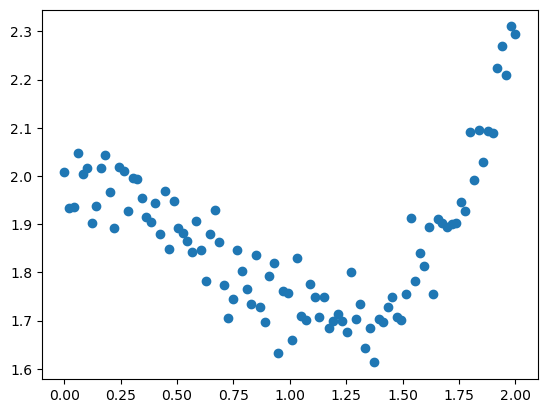

In [7]:
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [8]:
def f (x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [9]:
from scipy import optimize

In [10]:
params, params_cov = optimize.curve_fit(f, x, y)

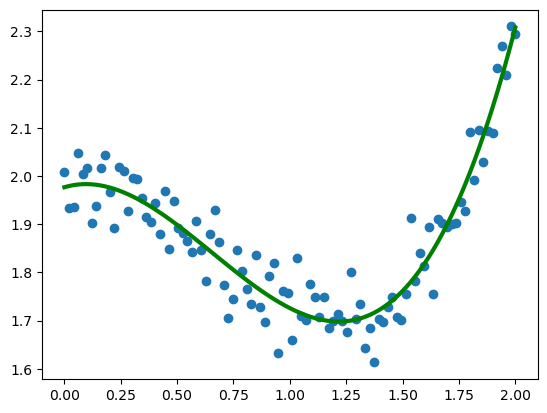

In [11]:
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

In [12]:
def f(x):
    return x**2 + 15*np.sin(x)

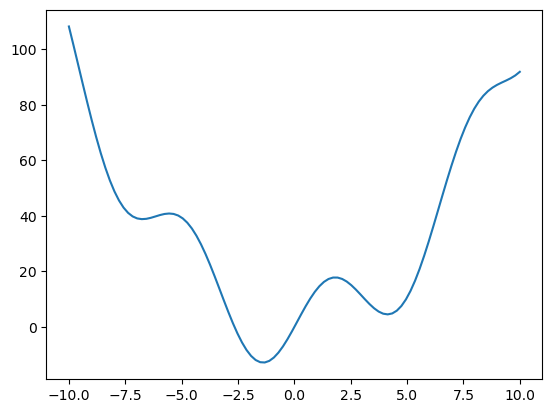

In [13]:
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [14]:
x0 = -5
result = optimize.minimize(f, x0= x0).x

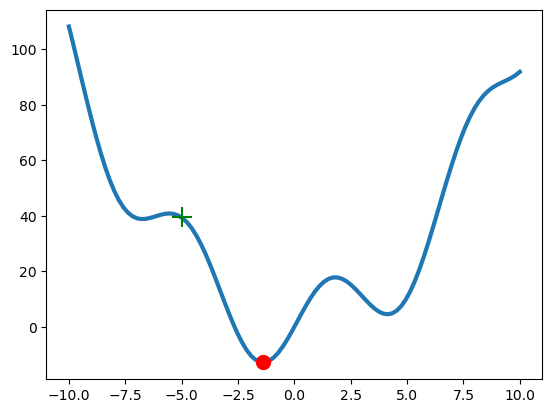

In [15]:
plt.plot(x, f(x), lw=3, zorder=-1)
plt.scatter(result, f(result), s=100, c='r', zorder=1)
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1)
plt.show()

In [16]:
def f (x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

[-0.78539918 -2.3561934 ]


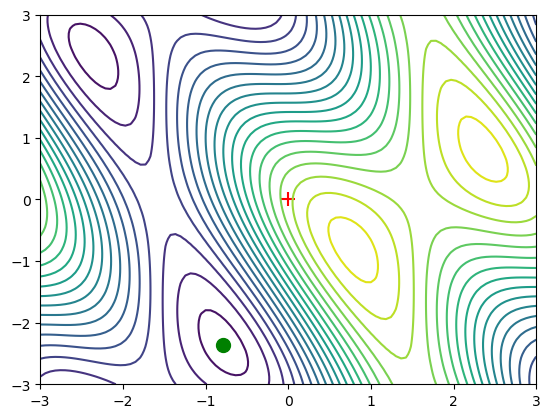

In [17]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
plt.contour(x, y, f(np.array([x, y])), 20)

x0 = np.zeros(2)
plt.scatter(x0[0], x0[0], marker='+', c='r', s=100)

result = optimize.minimize(f, x0=x0).x

plt.scatter(result[0], result[1], c='g', s=100)
print(result)

# Traitement du signal

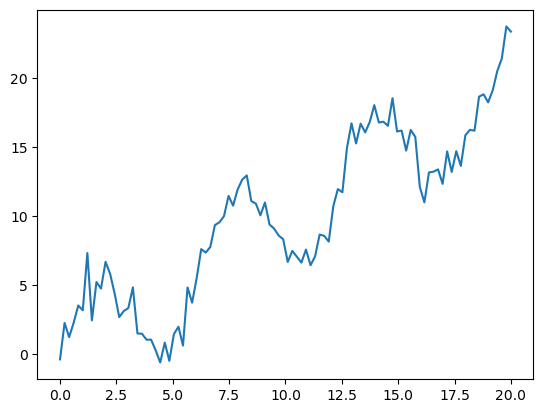

In [18]:
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x, y)

In [19]:
from scipy import signal

In [20]:
new_y = signal.detrend(y)

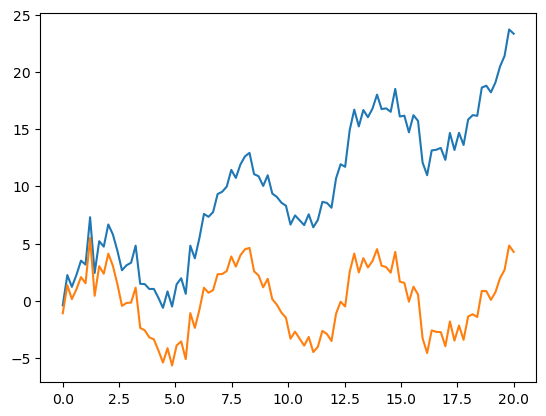

In [21]:
plt.plot(x, y)
plt.plot(x, new_y)

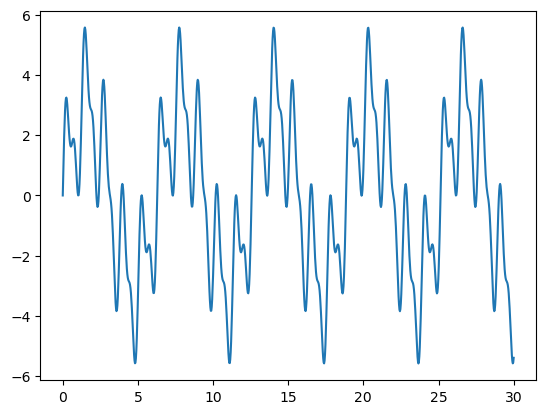

In [22]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)
plt.plot(x, y)

In [23]:
from scipy import fftpack

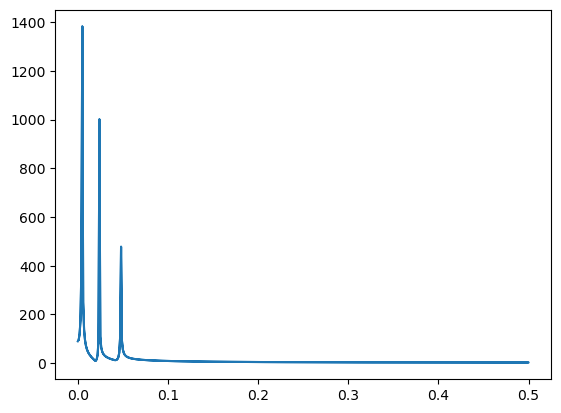

In [24]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

# Transformation de Fourier

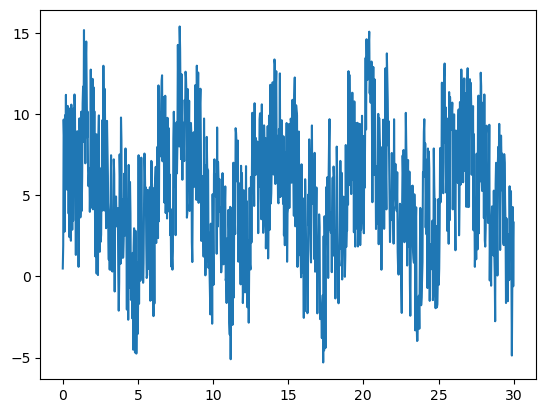

In [25]:
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)

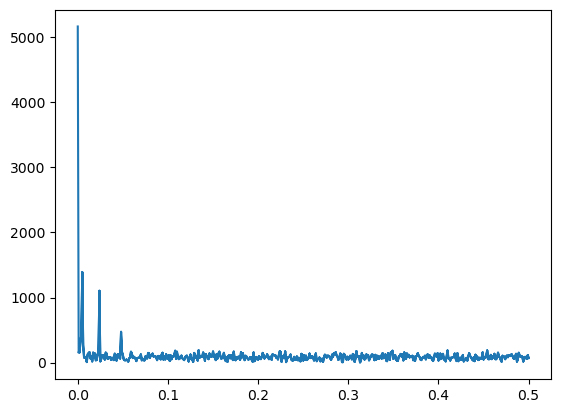

In [26]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

In [27]:
fourier[power < 400] = 0

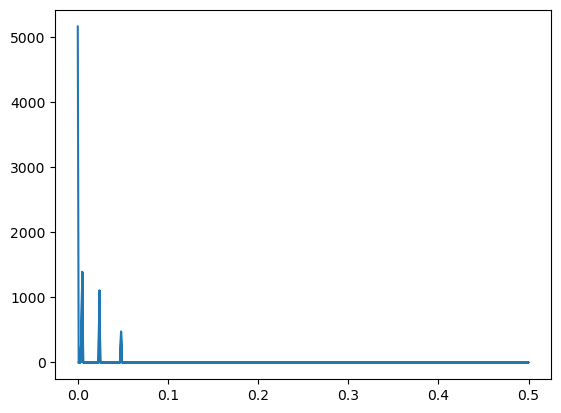

In [28]:
plt.plot(np.abs(frequences), np.abs(fourier))

In [29]:
filtered_signal = fftpack.ifft(fourier)

C:\Users\angec\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\angec\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


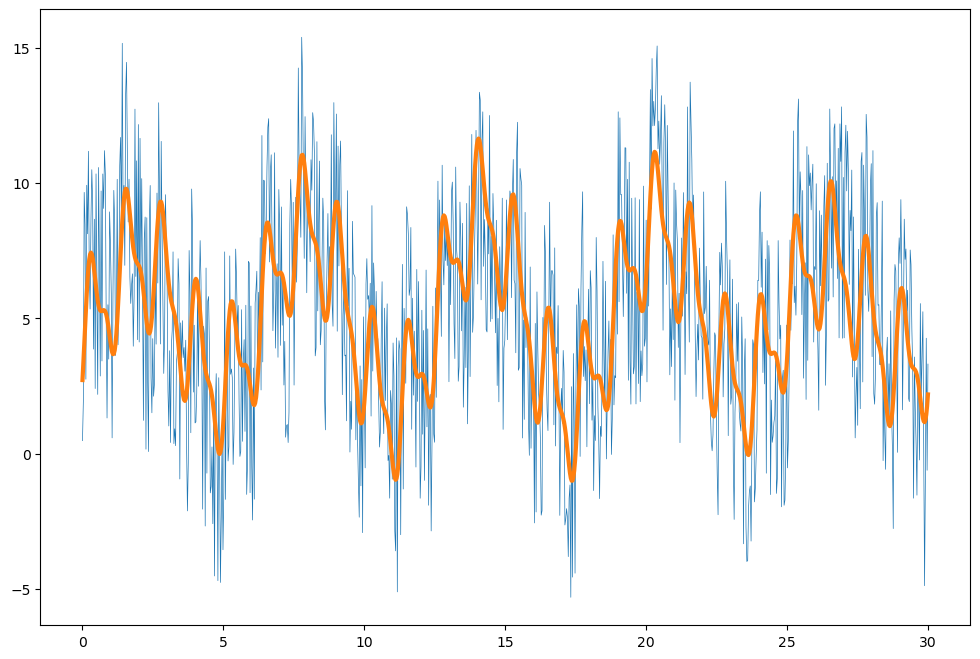

In [30]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5)
plt.plot(x, filtered_signal, lw = 3)
plt.show()

# 4) image processing

In [31]:
from scipy import ndimage

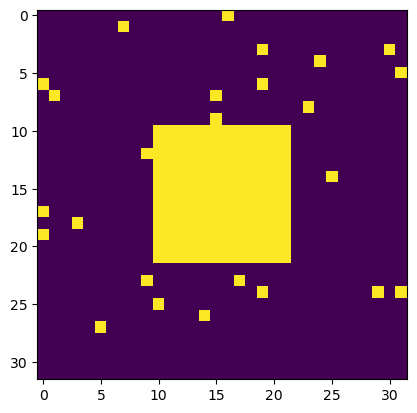

In [32]:
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)

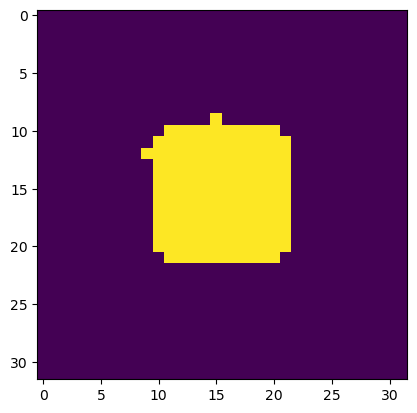

In [33]:
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

(582, 932)

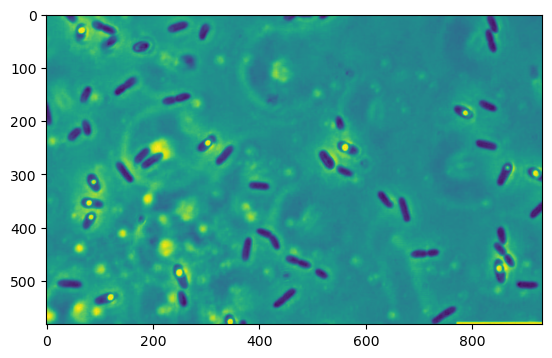

In [49]:
image = plt.imread('bacteria.jpg')
image = image[:,:,0]
plt.imshow(image)
image.shape

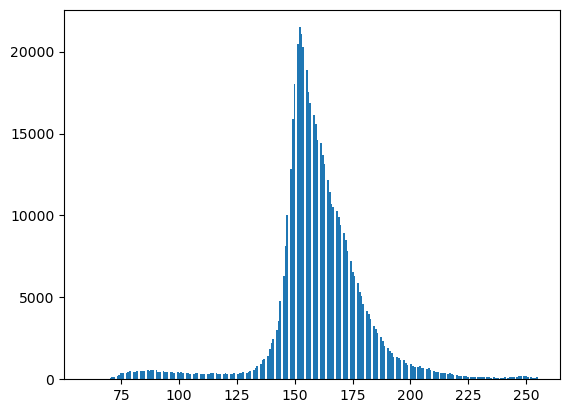

In [54]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins = 255)
plt.show()

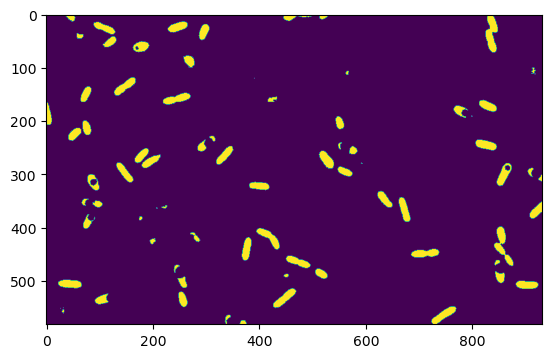

In [58]:
image_3 = image < 130
plt.imshow(image_3)

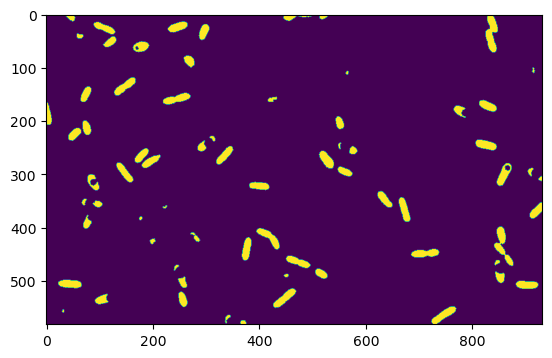

In [59]:
open_x = ndimage.binary_opening(image_3)
plt.imshow(open_x)

In [62]:
label_image, n_labels = ndimage.label(open_x)
print(n_labels)

70


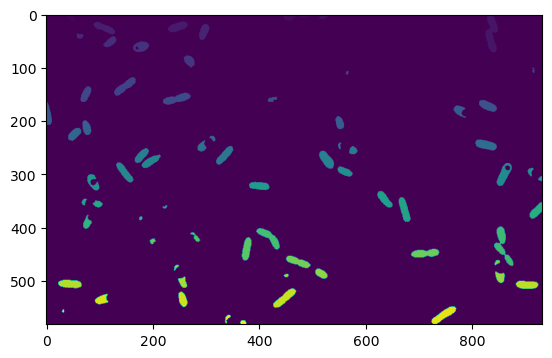

In [63]:
plt.imshow(label_image)

In [65]:
sizes = ndimage.sum(open_x, label_image, range(n_labels))

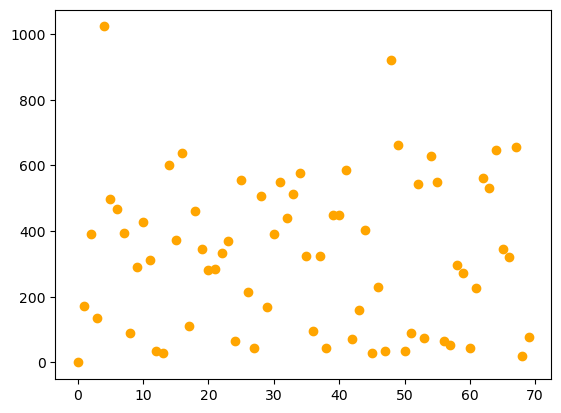

In [67]:
plt.scatter(range(n_labels), sizes, c='orange')